In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
# x, y 범위

x_set = np.arange(2, 13) 
y_set = np.arange(1, 7)

In [8]:
# 결합확률함수

def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

XY = [x_set, y_set, f_XY]

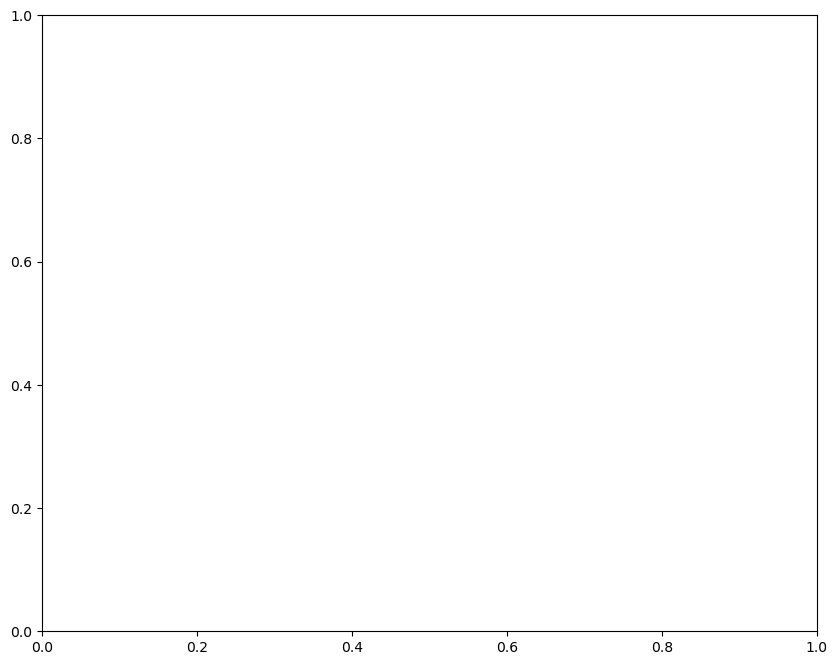

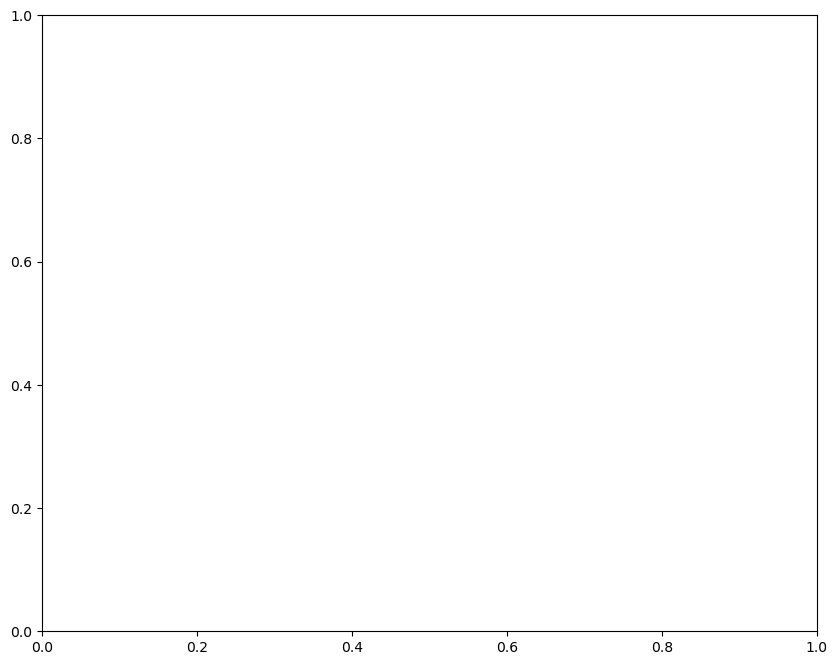

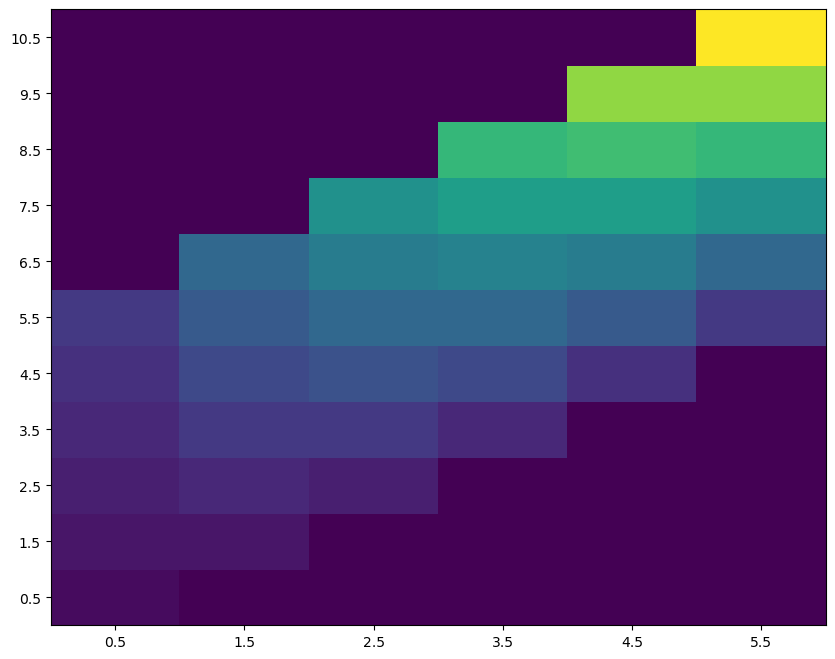

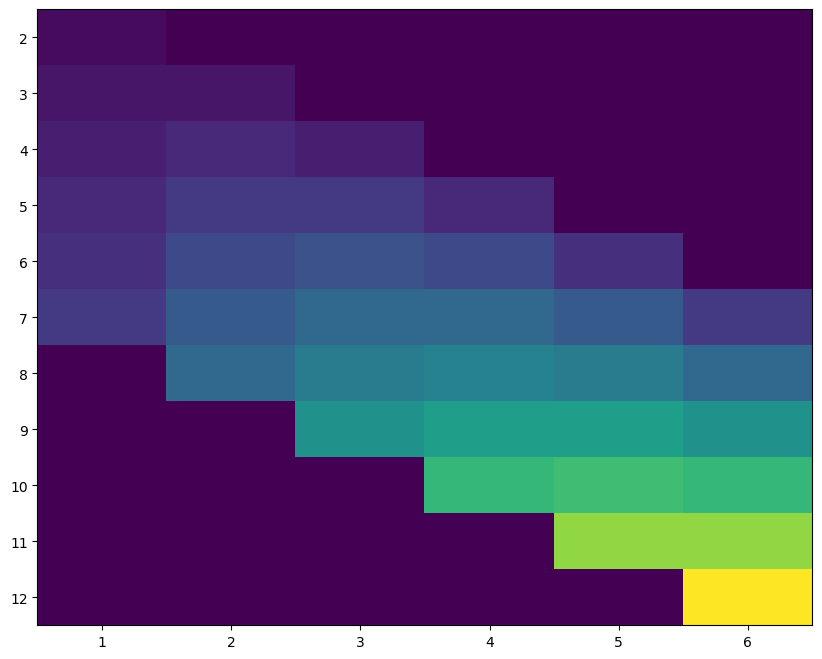

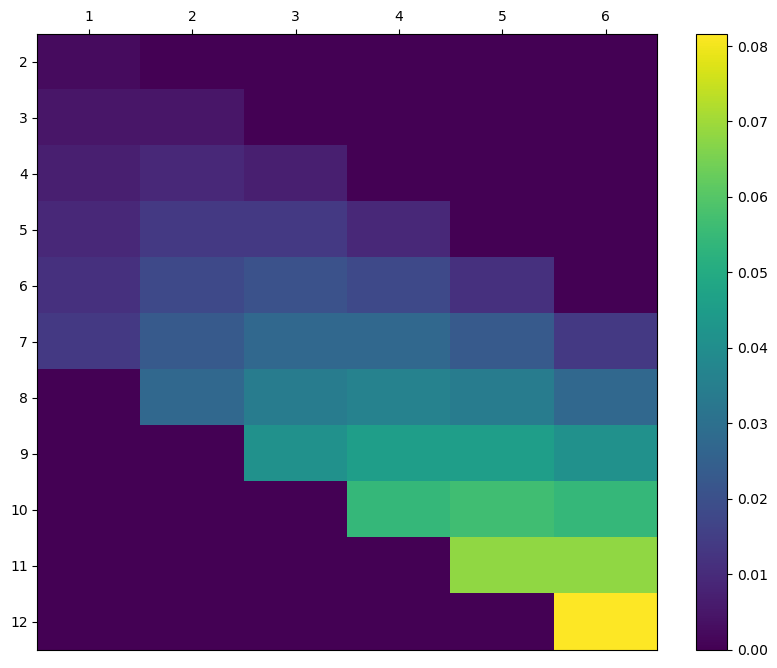

In [13]:
# 만든 결합확률함수의 확률분포 히트맵

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                for x_i in x_set])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

ax.invert_yaxis()

ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [14]:
# 각 확률들은 모두 0보다 큼

np.all(prob >= 0)

np.True_

In [15]:
# 확률의 합은 언제나 1

np.sum(prob)

1.000

In [61]:
# 주변확률분포 생성
# XY에서 x만을 뽑아냄
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [62]:
# XY에서 y만을 뽑아냄
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [63]:
X = [x_set, f_X]
Y = [y_set, f_Y]

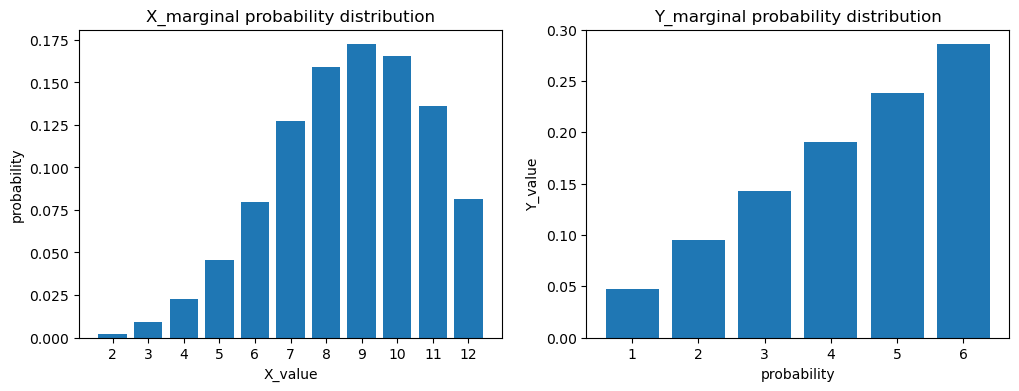

In [64]:
# 뽑아낸 확률 분포를 그래프로 표현

prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_ylabel('Y_value')
ax2.set_xlabel('probability')

plt.show()

In [26]:
# XY에서 x의 기대값 

np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [27]:
# 그 기대값을 함수로써 구현 

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

In [29]:
# x의 기대값 

mean_X = E(XY, lambda x, y:x)
mean_X

8.667

In [35]:
# y의 기대값

mean_Y = E(XY, lambda x, y:y)  
mean_Y 

4.333

In [36]:
a, b = 2, 3


In [37]:
# 각각 2, 3을 곱한 후 기대값의 선형성르 구함 

E(XY, lambda x, y: a*x + b*y)

30.333

In [38]:
a * mean_X + b * mean_Y

30.333

In [42]:
# XY에서 x의 분산 

np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
    for x_i in x_set for y_j in y_set])

4.444

In [49]:
# 분산을 함수로써 구현 
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [50]:
var_X = V(XY, g = lambda x, y:x)
var_X

4.444

In [51]:
# y의 분산 
var_Y = V(XY, g = lambda x, y:y)
var_Y

2.222

In [55]:
# x, y

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [56]:
cov_xy = Cov(XY)
cov_xy

2.222

In [57]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [58]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy 

64.444